# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [76]:
# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
complete_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [77]:
# Checking the number of mice.
complete_data["Mouse ID"].nunique()

249

In [78]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mouse = complete_data[complete_data.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
unique_mouse

array(['g989'], dtype=object)

In [79]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = complete_data[complete_data["Mouse ID"] == "g989"]
dupe_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[complete_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [81]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = summary_stat.mean()
median = summary_stat.median()
var = summary_stat.var()
st_dev = summary_stat.std()
sem = summary_stat.sem()

summary_stat_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': var,
    'Tumor Volume Std Deviation': st_dev,
    'Tumor Volume Std.Err': sem
})

summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

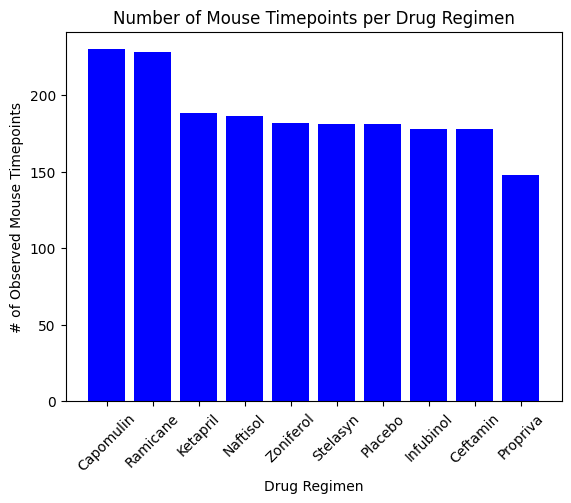

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_data['Drug Regimen'].value_counts()
x_axis = drug_regimen.index
y_axis = drug_regimen.values

plt.bar(x_axis, y_axis, color='blue')
plt.title('Number of Mouse Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

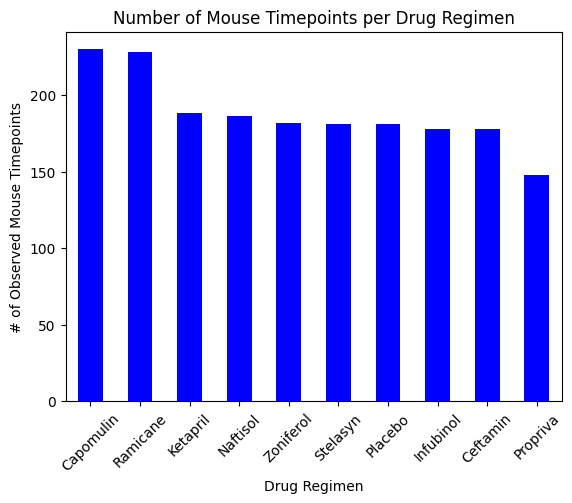

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar", title="Number of Mouse Timepoints per Drug Regimen", xlabel=("Drug Regimen"), ylabel=("# of Observed Mouse Timepoints"), color="blue", rot=45)
plt.show()

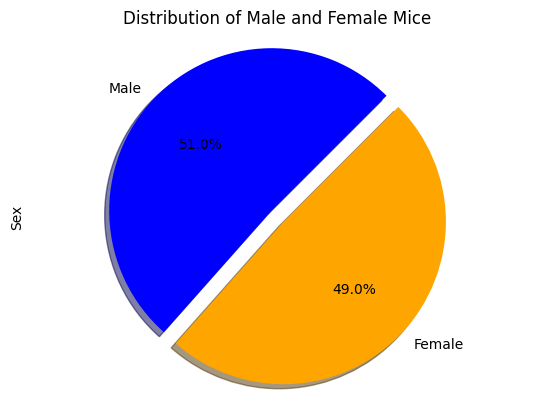

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sizes = clean_data["Sex"].value_counts()
labels = ["Male", "Female"]
color = ["blue", "orange"]
explode = [0.1,0]

plt.pie(sizes, explode=explode, labels=labels, colors=color, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis('equal')
plt.ylabel("Sex")
plt.title("Distribution of Male and Female Mice")
plt.show()

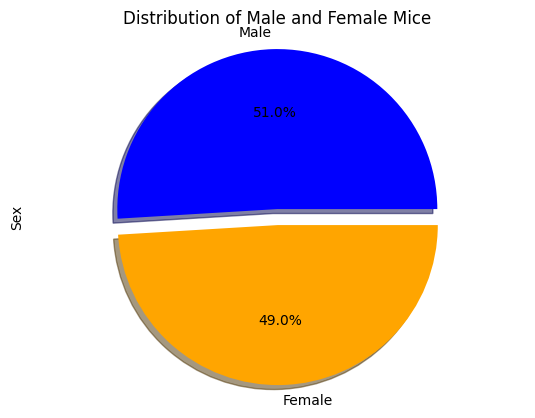

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_data["Sex"].value_counts()
sex_counts.plot(kind="pie", colors=["blue", "orange"], autopct="%1.1f%%", explode=[0.1, 0], shadow=True, title=("Distribution of Male and Female Mice"))
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
targeted = clean_data[clean_data['Drug Regimen'].isin(regimens)]
last_point = targeted.groupby('Mouse ID')['Timepoint'].idxmax()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = targeted.loc[last_point, ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume = final_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Final Tumor Vol"})

final_tumor_volume


,Mouse ID,Drug Regimen,Final Tumor Vol
1804,a203,Infubinol,67.973419
1786,a251,Infubinol,65.525743
1856,a275,Ceftamin,62.999356
1773,a411,Ramicane,38.407618
1836,a444,Ramicane,43.047543
...,...,...,...
1767,y769,Ceftamin,68.594745
1797,y793,Capomulin,31.896238
1766,y865,Ceftamin,64.729837
1799,z578,Ramicane,30.638696


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume[final_tumor_volume["Drug Regimen"] == drug]["Final Tumor Vol"]
    vol_data.append(tumor_vol)

    # add subset 

    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds

    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"Potential outliers for {drug}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Final Tumor Vol, dtype: float64)
Potential outliers for Ramicane: Series([], Name: Final Tumor Vol, dtype: float64)
Potential outliers for Infubinol: 420    36.321346
Name: Final Tumor Vol, dtype: float64
Potential outliers for Ceftamin: Series([], Name: Final Tumor Vol, dtype: float64)


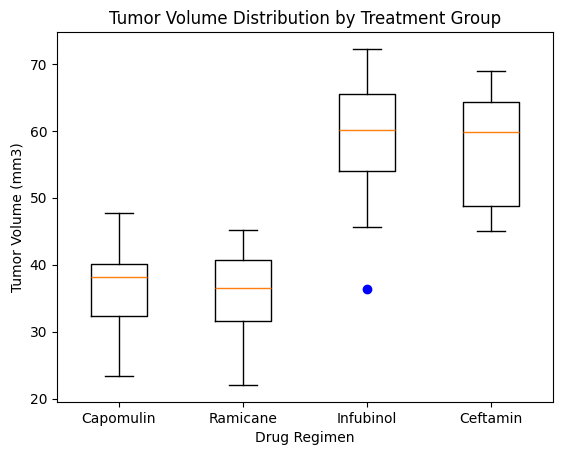

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_data, labels=regimens, sym='b')
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

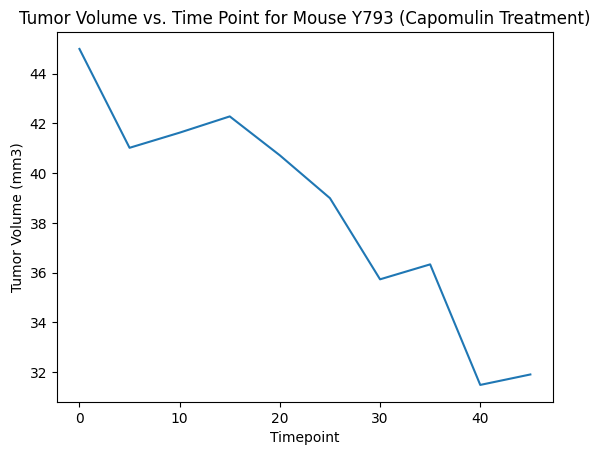

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "y793")]
mouse_id = "Y793"
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

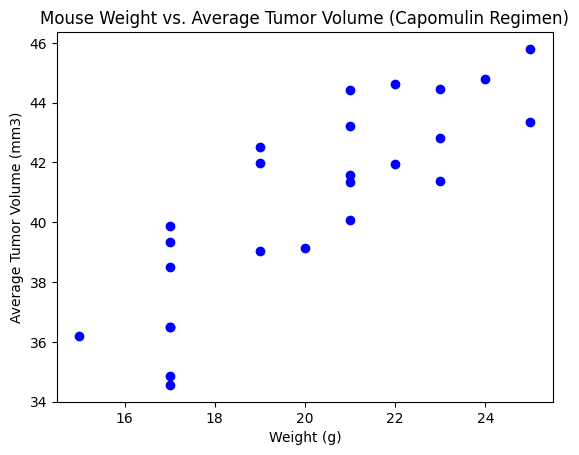

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = clean_data[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = clean_data[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].first()
combined_data = pd.DataFrame({"Weight (g)": mouse_weight, "Average Tumor Volume (mm3)": average_tumor_volume})
plt.scatter(combined_data["Weight (g)"], combined_data["Average Tumor Volume (mm3)"], marker='o', facecolors='b')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


Text(20, 36, 'y = 0.95x + 21.55')

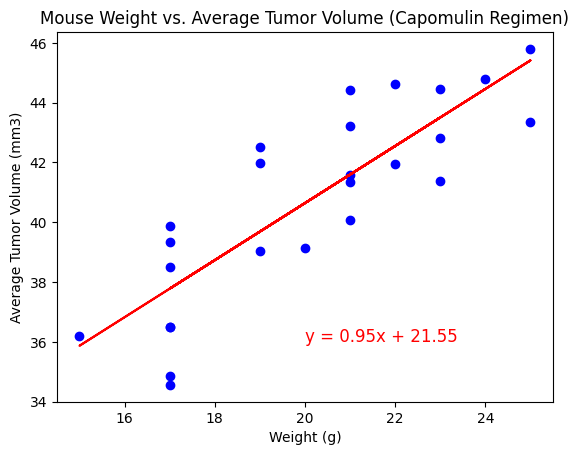

In [93]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = combined_data['Weight (g)']
y_values = combined_data["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(combined_data["Weight (g)"], combined_data["Average Tumor Volume (mm3)"], marker='o', facecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
correlation_coefficient = rvalue
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")
plt.text(20,36, line_eq, fontsize=12, color='r')